# Data Visualization with Matplotlib and Seaborn: Exploring MovieLens Data

## Introduction

In the previous sessions, you learned how to load, manipulate, and analyze data using Pandas. Now, we'll dive into **data visualization**, a crucial step in understanding data and communicating findings.

We will explore two powerful Python libraries for visualization:
1.  **Matplotlib:** A foundational library providing a wide variety of static, animated, and interactive visualizations in Python. We'll primarily use its `pyplot` module.
2.  **Seaborn:** Built on top of Matplotlib, Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. It often simplifies creating complex visualizations and offers better default aesthetics.

We'll continue working with the MovieLens dataset.

## Setup

First, let's import Pandas, Matplotlib's `pyplot` module, and Seaborn. We'll also load our familiar MovieLens datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice default style for Seaborn plots
sns.set_theme(style="whitegrid")

# Load the datasets
movies_url = 'https://drive.google.com/uc?export=download&id=1Uztnn449pnDBDn1XGJPF6uzV34jrP1Te'
ratings_url = 'https://drive.google.com/uc?export=download&id=15IOZXK7f8nvfxhUXap9VEnZDzBTyu2xI'

movies_df = pd.read_csv(movies_url)
ratings_df = pd.read_csv(ratings_url)

# For some visualizations, it's helpful to merge them
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

print("movies_df head:")
print(movies_df.head())
print("\nratings_df head:")
print(ratings_df.head())
print("\nmerged_df head:")
print(merged_df.head())

movies_df head:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

ratings_df head:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

merged_df head:
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation

## Part 1: Matplotlib Basics

Matplotlib is very flexible but can sometimes be verbose. We'll start with some common plot types using `plt` (the alias for `matplotlib.pyplot`).

### 1.1: Histograms - Distribution of Ratings
Histograms are great for visualizing the distribution of a single numerical variable.
Let's see the distribution of movie ratings in `ratings_df`.

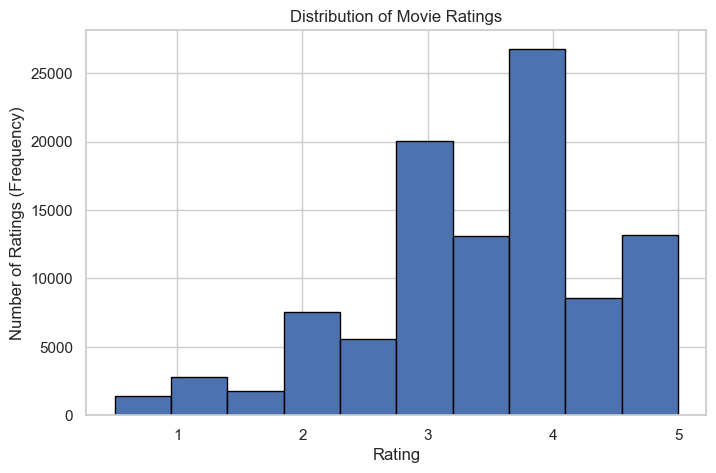

In [2]:
plt.figure(figsize=(8, 5)) # Optional: Adjust figure size
plt.hist(ratings_df['rating'], bins=10, edgecolor='black') # `bins` controls the number of bars
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings (Frequency)')
plt.show() # This command displays the plot

**Observation:** Most ratings are whole numbers (3.0, 4.0, 5.0). There's a preference for higher ratings.

### 1.2: Bar Charts - Number of Movies per Genre (Simplified)
Bar charts are used to compare quantities for different categories.
The 'genres' column is tricky because movies can have multiple genres. For a simple Matplotlib bar chart, let's count the occurrences of a few specific, individual genres.

First, let's get the counts (we did this with `value_counts()` in Pandas, but we need to process it for individual genres).

In [3]:
genre_counts = movies_df['genres'].str.split('|').explode().value_counts()

top_n_genres = 10
common_genres = genre_counts.head(top_n_genres)

print("Top 10 common individual genres:")
print(common_genres)

Top 10 common individual genres:
genres
Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: count, dtype: int64


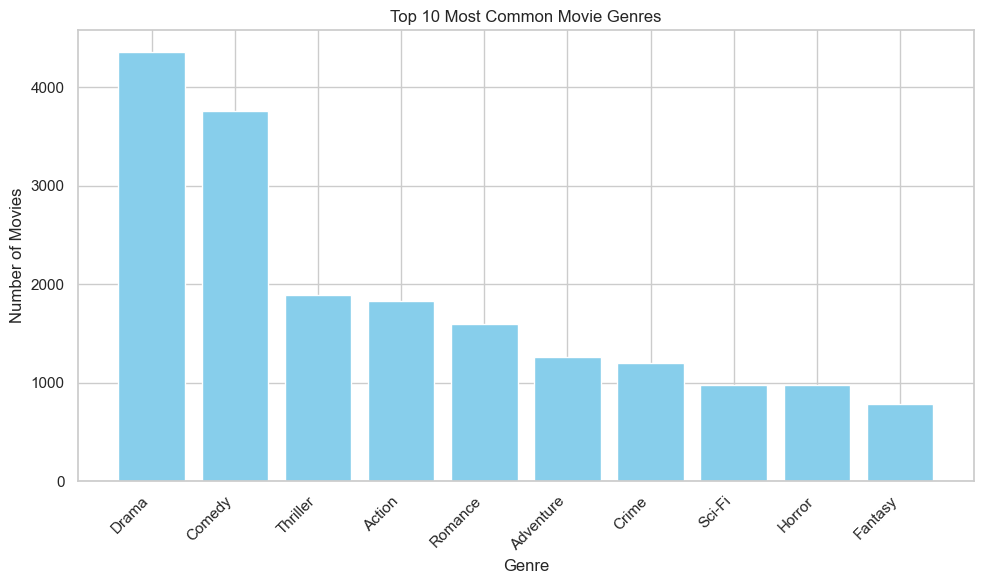

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(common_genres.index, common_genres.values, color='skyblue')
plt.title(f'Top {top_n_genres} Most Common Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Observation:** Drama and Comedy are the most frequent individual genres.

### 1.3: Scatter Plots - Relationship between Number of Ratings and Average Rating (Conceptual)
Scatter plots are used to visualize the relationship between two numerical variables.
Let's prepare data for `avg_rating` and `num_ratings` per movie.

In [5]:
movie_stats_df = merged_df.groupby('title')['rating'].agg(['mean', 'count']).reset_index()
movie_stats_df.columns = ['title', 'avg_rating', 'num_ratings']
movie_stats_df.head()

,title,avg_rating,num_ratings
0,'71 (2014),4.0,1
1,'Hellboy': The Seeds of Creation (2004),4.0,1
2,'Round Midnight (1986),3.5,2
3,'Salem's Lot (2004),5.0,1
4,'Til There Was You (1997),4.0,2


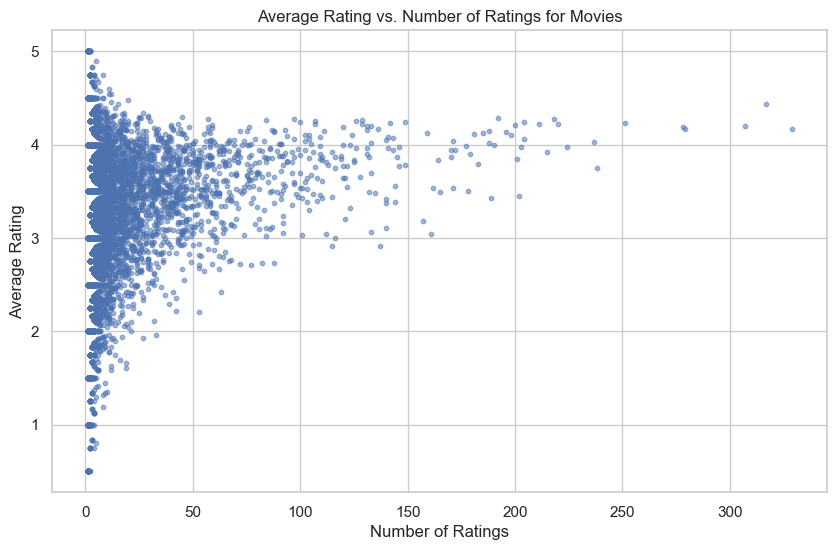

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(movie_stats_df['num_ratings'], movie_stats_df['avg_rating'], alpha=0.5, s=10) # alpha for transparency, s for size
plt.title('Average Rating vs. Number of Ratings for Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
#plt.xscale('log') # Use a log scale for num_ratings due to wide range
plt.show()

**Observation:** Movies with very few ratings can have extreme average ratings (both high and low). As the number of ratings increases, average ratings tend to converge.

## Part 2: Seaborn for Enhanced Statistical Visualizations

Seaborn simplifies creating many common statistical plots and often produces more aesthetically pleasing results with less code.

### 2.1: Histogram with Seaborn (`displot` or `histplot`)
Seaborn's `histplot` (or the more general `displot` with `kind='hist'`) can create histograms, often with a Kernel Density Estimate (KDE) overlay.

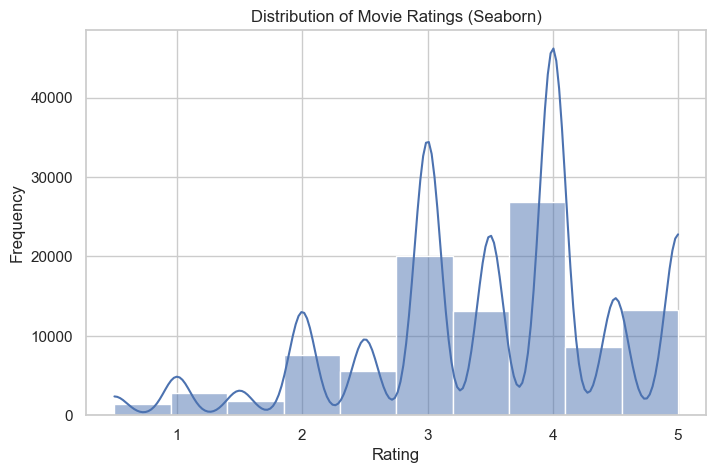

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=ratings_df, x='rating', bins=10, kde=True) # kde=True adds a density curve
plt.title('Distribution of Movie Ratings (Seaborn)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 2.2: Scatter Plot with Seaborn (`scatterplot`)
Seaborn's `scatterplot` can also add more information, like coloring points by a third variable.

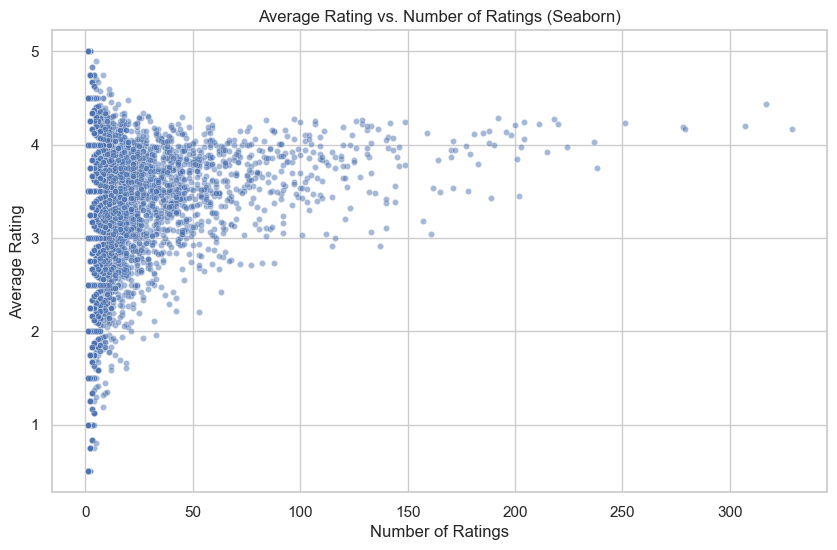

In [10]:
# Using movie_stats_df from earlier
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_stats_df, x='num_ratings', y='avg_rating', alpha=0.5, s=20)
plt.title('Average Rating vs. Number of Ratings (Seaborn)')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
#plt.xscale('log')
plt.show()

## Part 3: Customizing Plots

Both Matplotlib and Seaborn offer extensive customization options:
*   **Titles and Labels:** `plt.title()`, `plt.xlabel()`, `plt.ylabel()` (or `ax.set_title()`, etc. with Matplotlib's object-oriented API).
*   **Figure Size:** `plt.figure(figsize=(width, height))`.
*   **Colors:** `color` parameter in most plotting functions, `palette` in Seaborn.
*   **Legends:** `plt.legend()`.
*   **Text Annotations:** `plt.text()`.
*   **Axis Limits and Scales:** `plt.xlim()`, `plt.ylim()`, `plt.xscale('log')`.
*   **Seaborn Styles:** `sns.set_theme(style=...)`, `sns.set_palette(...)`.

**Example: Re-doing the ratings histogram with more customization.**

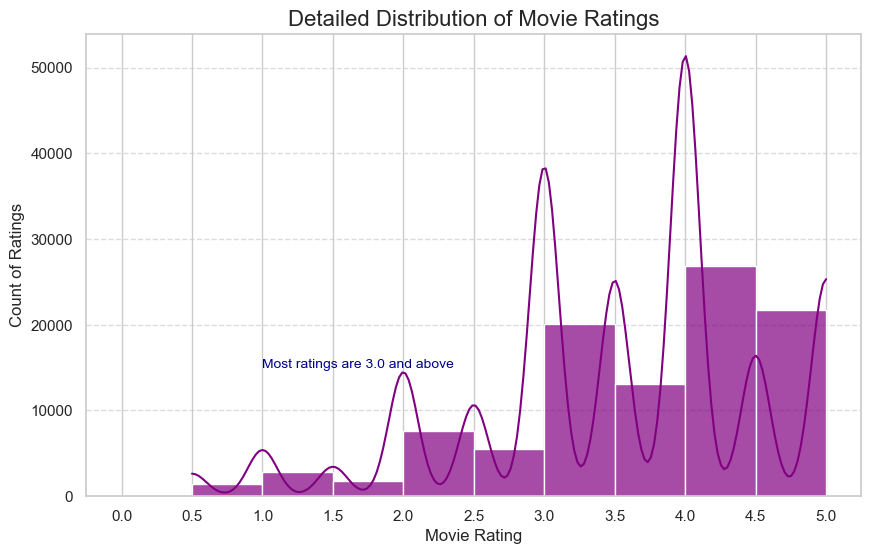

In [14]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(data=ratings_df, x='rating', bins=np.arange(0, 5.5, 0.5), kde=True, color='purple', alpha=0.7)
plt.title('Detailed Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Movie Rating', fontsize=12)
plt.ylabel('Count of Ratings', fontsize=12)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text(1, 15000, 'Most ratings are 3.0 and above', fontsize=10, color='darkblue')
plt.show()

# Need to import numpy for np.arange
import numpy as np 

## Conclusion and Further Exploration

Data visualization is a powerful tool for understanding patterns, trends, and relationships in your data. 
*   **Matplotlib** provides fine-grained control for creating a wide array of plots.
*   **Seaborn** simplifies the creation of common statistical plots and enhances their aesthetics.

**Practice Ideas:**
1.  **Release Year Distribution:** Create a histogram of movie release years (extract year from `movies_df['title']` if you haven't already).
2.  **Ratings Over Time:** If you convert the `timestamp` in `ratings_df` to datetime objects, you could try plotting average ratings per year or month.
3.  **Tags per User:** Create a bar chart showing the number of tags applied by the top 10 most active taggers.
4.  **Pair Plot:** Use `sns.pairplot()` on a subset of numerical columns from `movie_stats_df` (e.g., `avg_rating`, `num_ratings`) to see pairwise relationships and distributions.

The best way to learn is to experiment with different plot types, datasets, and customization options!